<a href="https://colab.research.google.com/github/nudojacopo/nudojacopo/blob/main/synthetic_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [2]:
!git clone https://github.com/nudojacopo/thesis.git
from google.colab import drive
drive.mount('/content/drive')
root='/content/'
import sys
module_path = root+'thesis/src/SYN'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
!pip install powerlaw
from SYN_package.functions import *
from SYN_package.estimate_parameters import *
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import powerlaw
import warnings

fatal: destination path 'thesis' already exists and is not an empty directory.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Prepare Data

In [3]:
rd=pd.read_csv('/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified_processed.csv')
fb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_snews_processed.csv')
vo=pd.read_csv('/content/drive/MyDrive/thesis/data/voat/voat_processed.csv')
yt=pd.read_csv('/content/drive/MyDrive/thesis/data/youtube/processed_sample.csv')

fbb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_brexit_all_comments_scored_processed.csv')

fbv=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_vaccines_all_comments_scored_processed.csv')


In [4]:
fb = fb[fb['temporal_distance_birth_h'] < 100].copy()
fb['temporal_distance_birth_base_100h'] = fb['temporal_distance_birth_h'] / 100
fb['IAT_base_100h']=fb['IAT_user_thread']/(60*60*100)

fbb = fbb[fbb['temporal_distance_birth_h'] < 100].copy()
fbb['temporal_distance_birth_base_100h'] = fbb['temporal_distance_birth_h'] / 100
fbb['user_id']=fbb['from_id']
fbb['IAT_base_100h']=fbb['IAT_user_thread']/(60*60*100)

fbv = fbv[fbv['temporal_distance_birth_h'] < 100].copy()
fbv['temporal_distance_birth_base_100h'] = fbv['temporal_distance_birth_h'] / 100
fbv['user_id']=fbv['from_id']
fbv['IAT_base_100h']=fbv['IAT_user_thread']/(60*60*100)

rd = rd[rd['temporal_distance_birth_h'] < 100].copy()
rd['IAT_base_100h']=rd['IAT_user_thread']/(60*60*100)
rd['created_at']=rd['date']
rd['comment_id']=rd['comment_code']
rd['temporal_distance_birth_base_100h'] = rd['temporal_distance_birth_h'] / 100

vo = vo[vo['temporal_distance_birth_h'] < 100].copy()
vo['IAT_base_100h']=vo['IAT_user_thread']/(60*60*100)
vo['temporal_distance_birth_base_100h'] = vo['temporal_distance_birth_h'] / 100
vo['post_id'] = vo['root_submission']
vo['user_id']=vo['user']

yt = yt[yt['temporal_distance_birth_h'] < 100].copy()
yt['IAT_base_100h']=yt['IAT_user_thread']/(60*60*100)
yt['temporal_distance_birth_base_100h'] = yt['temporal_distance_birth_h'] / 100
yt['user_id']=yt['user']



## Search parameters

In [5]:
from SYN_package.estimate_parameters import *
params_dict={}

names = ['vo', 'fb', 'rd', 'yt']
datas = [vo, fb, rd, yt]  # Assuming vo, fb, rd, yt are your actual dataframes

params_dict = process_social_platform(names, datas)
print(params_dict)

 75%|███████▌  | 3/4 [16:20<05:26, 326.87s/it]


KeyboardInterrupt: 

In [6]:
params_dict={'vo': {'gamma': 5.560174158235733,
  'a': 0.7683453768943135,
  'b': 181.35859916908146,
  'loc': 0.0009999999999999998,
  'scale': 10.849357267138616,
  'alpha': 0.35,
  'lambda': 0.5000000000000001,
  'c': 1.3825444184574849,
  'd': 0.3148667223304995,
  'l': -7.559994673910446e-07,
  's': 0.014817594985246601,
  'cf': 5.288800316735881,
  'df': 0.04913571005774435,
  'lf': 2.7777777777777775e-06,
  'sf': 0.24403022567064098},
 'fb': {'gamma': 1.920612852062878,
  'a': 0.3844295492882861,
  'b': 294.47288219865607,
  'loc': 0.0009999999999999998,
  'scale': 33.07578198818712,
  'alpha': 0.1,
  'lambda': 1.0500000000000003,
  'c': 1.4925263821442911,
  'd': 0.08849381153322906,
  'l': 2.7777777777777775e-06,
  's': 1.3440750553651393,
  'cf': 1.1530515610823424,
  'df': 0.1221286925154284,
  'lf': 2.7777777777777775e-06,
  'sf': 1.243471290490271},
 'rd': {'gamma': 2.1172386372477376,
  'a': 1.3208418726992361,
  'b': 366274394.2558266,
  'loc': 0.00043188573340450587,
  'scale': 21377429.04281839,
  'alpha': 0.3,
  'lambda': 0.5000000000000001,
  'c': 1.4035122312087873,
  'd': 0.34547543092801714,
  'l': 2.777777777776469e-06,
  's': 0.009685929534020282,
  'cf': 1.061267002974987,
  'df': 0.16381176822206486,
  'lf': 2.7777777777777775e-06,
  'sf': 1.708837260306469},
 'yt': {'gamma': 1.4925219530385783,
  'a': 0.5186615140672572,
  'b': 1.7898387515641103,
  'loc': 0.0009999999999999998,
  'scale': 1.1104373293304093,
  'alpha': 0.25,
  'lambda': 0.7000000000000002,
  'c': 0.23913021624295291,
  'd': 0.8360268077508817,
  'l': 2.7777777777777775e-06,
  's': 1.1670856167197128,
  'cf': 0.9540739202382167,
  'df': 0.16186901441564588,
  'lf': 2.7777777777777775e-06,
  'sf': 1.6193827108817946}}

## Simulate synthetic data

In [7]:
names = ['vo', 'fb', 'rd', 'yt']
datas = [vo, fb, rd, yt]  # Assuming vo, fb, rd, yt are your actual dataframes
time_intervals = np.arange(0, 1, 0.01)
all_dfs=[]
for i,df in  (enumerate(datas)):#,total=len(datas)):
    social=names[i]
    parameters=params_dict[social]
    # Simulazione dei dati per la piattaforma corrente
    n = 100
    simulated_t, observed_t = simulate_data(df, parameters['gamma'], parameters['a'], parameters['b'], parameters['loc'],
                                            parameters['scale'], parameters['alpha'], parameters['lambda'], parameters['c'],
                                            parameters['d'], parameters['l'], parameters['s'], parameters['cf'],
                                            parameters['df'], parameters['lf'], parameters['sf'], num_threads=n,activate_tqdm=False)
    globals()[social+'s'] = simulated_t
    globals()[social+'o'] = observed_t


    # Calcolo dell'ECDF per i dati simulati e osservati
    simulated_t_ECDF = calculate_ECDF(simulated_t, time_intervals)
    simulated_t_ECDF['Platform'] = social
    simulated_t_ECDF['Style'] = 'Simulated'

    observed_t_ECDF = calculate_ECDF(observed_t, time_intervals)
    observed_t_ECDF['Platform'] = social
    observed_t_ECDF['Style'] = 'Observed'

    # Concatenazione dei dataframe per simulati e osservati per la piattaforma corrente
    df_platform = pd.concat([simulated_t_ECDF, observed_t_ECDF], ignore_index=True)
    all_dfs.append(df_platform)

# Concatenazione di tutti i dataframe delle piattaforme
df_all = pd.concat(all_dfs, ignore_index=True)



Processing DataFrame: 100%|██████████| 100/100 [00:12<00:00,  8.28it/s]


## Dynamic

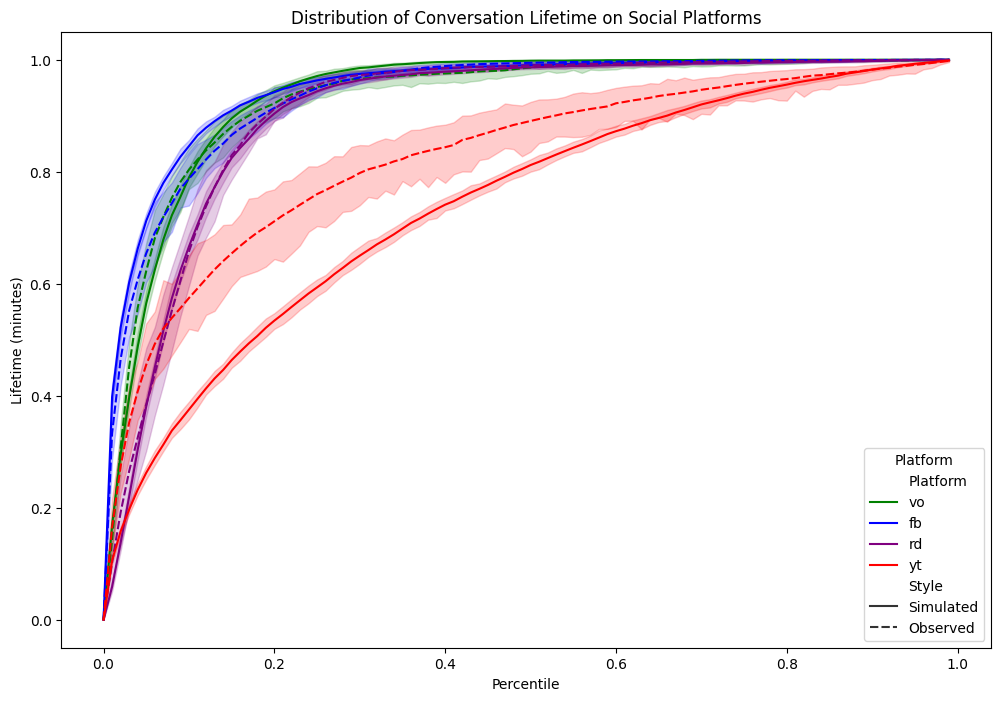

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_all is already defined and contains the necessary data
# Custom palette
palette = {'rd': 'purple', 'vo': 'green', 'fb': 'blue', 'yt': 'red'}

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_all, x='Time Grid Value', y='Share', hue='Platform', style='Style', err_style='band', errorbar=('ci', 100), palette=palette)
plt.title('Distribution of Conversation Lifetime on Social Platforms')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()


## Lifetime

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rds=rds.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
fbs=fbs.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
vos=vos.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
yts=yts.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()


# Calcolare il tempo totale di conversazione per ogni utente e post in rd
time_of_conversation_rd = rds.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in rd
mean_time_of_conversation_rd = time_of_conversation_rd.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in fb
time_of_conversation_fb = fbs.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in fb
mean_time_of_conversation_fb = time_of_conversation_fb.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in vo
time_of_conversation_vo = vos.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in vo
mean_time_of_conversation_vo = time_of_conversation_vo.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in rd
time_of_conversation_yt = yts.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in rd
mean_time_of_conversation_yt = time_of_conversation_yt.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()


# Unire i dati per fare il confronto
mean_time_of_conversation_rd['source'] = 'rd'
mean_time_of_conversation_fb['source'] = 'fb'
mean_time_of_conversation_vo['source'] = 'vo'
mean_time_of_conversation_yt['source'] = 'yt'

combined_data = pd.concat([
    mean_time_of_conversation_rd,
        mean_time_of_conversation_vo,
        mean_time_of_conversation_yt,
    mean_time_of_conversation_fb

])

# Creare i boxplot per confrontare le distribuzioni
plt.figure(figsize=(12, 8))
sns.boxplot(x='source', y='temporal_distance_birth_base_100h', data=combined_data, showfliers=False, palette=['purple', 'green','red', 'blue'])
plt.title('Simulated')
plt.xlabel('Fonte')
plt.ylabel('Tempo medio di conversazione (IAT_user_thread)')
plt.ylim(0,0.4)
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rdo=rdo.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
fbo=fbo.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
voo=voo.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
yto=yto.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()


# Calcolare il tempo totale di conversazione per ogni utente e post in rd
time_of_conversation_rd = rdo.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in rd
mean_time_of_conversation_rd = time_of_conversation_rd.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in fb
time_of_conversation_fb = fbo.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in fb
mean_time_of_conversation_fb = time_of_conversation_fb.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in vo
time_of_conversation_vo = voo.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in vo
mean_time_of_conversation_vo = time_of_conversation_vo.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in rd
time_of_conversation_yt = yto.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in rd
mean_time_of_conversation_yt = time_of_conversation_yt.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()


# Unire i dati per fare il confronto
mean_time_of_conversation_rd['source'] = 'rd'
mean_time_of_conversation_fb['source'] = 'fb'
mean_time_of_conversation_vo['source'] = 'vo'
mean_time_of_conversation_yt['source'] = 'yt'

combined_data = pd.concat([
    mean_time_of_conversation_rd,
        mean_time_of_conversation_vo,
        mean_time_of_conversation_yt,
    mean_time_of_conversation_fb

])

# Creare i boxplot per confrontare le distribuzioni
plt.figure(figsize=(12, 8))
sns.boxplot(x='source', y='temporal_distance_birth_base_100h', data=combined_data, showfliers=False, palette=['purple', 'green','red', 'blue'])
plt.title('Observed')
plt.xlabel('Fonte')
plt.ylabel('Tempo medio di conversazione (IAT_user_thread)')
plt.ylim(0,0.4)
plt.show()


## Conversation

  0%|          | 0/4 [00:00<?, ?it/s]<ipython-input-13-cee92aa5d89f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['temporal_distance_birth_base_100h'])
<ipython-input-13-cee92aa5d89f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sequential_position'] = df.groupby('post_id')['time'].rank(method='first')
<ipython-input-13-cee92aa5d89f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

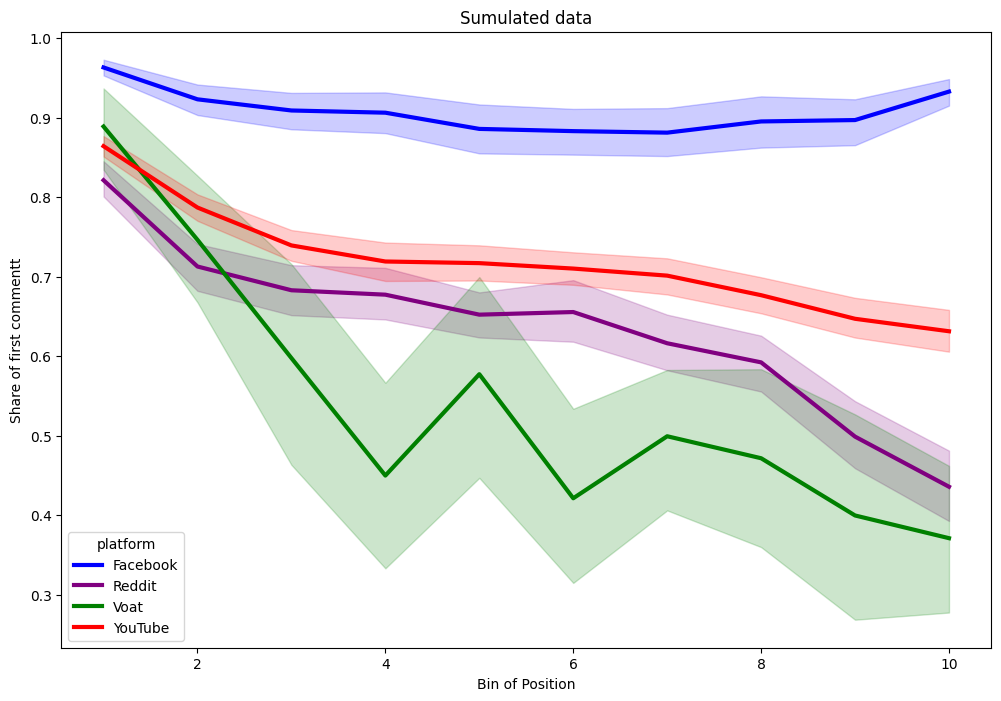

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # tqdm for progress bar

# Assuming rd, fb, vo, yt are your DataFrames

# Add 'platform' column to each DataFrame
rdo['platform'] = 'Reddit'
voo['platform'] = 'Voat'
fbo['platform'] = 'Facebook'
yto['platform'] = 'YouTube'
# Combine all DataFrames into a single DataFrame
all_data = []

# Process each dataset individually
for df in tqdm([rdo,  voo,yto,fbo]):
    df['number_of_comments'] = df.groupby('post_id')['post_id'].transform('count')
    df=df[df['number_of_comments']>100]
    df['time'] = pd.to_datetime(df['temporal_distance_birth_base_100h'])
    df['sequential_position'] = df.groupby('post_id')['time'].rank(method='first')

    # Determine the number of bins
    num_bins = 10

    # Calculate the bin of position
    df['bin_of_position'] = ((df['sequential_position'] - 1) / df['number_of_comments'] * num_bins).astype(int) + 1

    # Adjust bins to be between 1 and num_bins
    df['bin_of_position'] = df['bin_of_position'].clip(lower=1, upper=num_bins)
    df['first_comment']=df['sequential_number_of_comment_by_user_in_thread']==1
    # Group by 'bin_of_position', 'post_id', and calculate unique users per post
    df['first_comment'] = df.groupby(['bin_of_position', 'post_id'])['first_comment'].transform('mean')
    all_data.append(df)
all_data = pd.concat(all_data, ignore_index=True)
# Aggregate data across all datasets
agg_activity = all_data.groupby(['platform', 'bin_of_position', 'post_id'])['first_comment'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=agg_activity,
    x='bin_of_position',
    y='first_comment',
    hue='platform',  # Different line for each platform
    estimator='mean',  # or 'sum', 'median', etc. depending on your aggregation preference
    errorbar=('ci', 80),  # 99.999% confidence interval
    linewidth=3,
    palette={'Reddit': 'purple', 'Voat': 'green', 'Facebook': 'blue','YouTube':'red'}  # Custom palette with specified colors
)
plt.title('Sumulated data')
plt.ylabel('Share of first commentt')
plt.xlabel('Bin of Position')
plt.grid(False)
plt.show()


  0%|          | 0/4 [00:00<?, ?it/s]<ipython-input-14-6e0fd3625d49>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['temporal_distance_birth_base_100h'])
<ipython-input-14-6e0fd3625d49>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sequential_position'] = df.groupby('post_id')['time'].rank(method='first')
<ipython-input-14-6e0fd3625d49>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

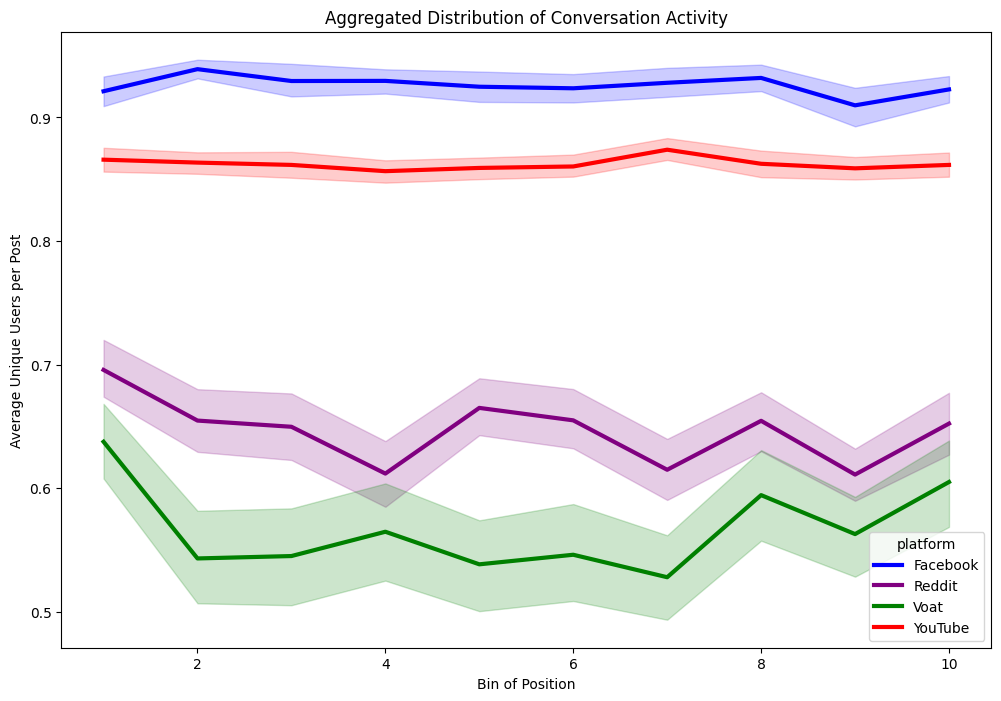

Index(['user_id', 'post_id', 'temporal_distance_birth_base_100h',
       'sequential_number_of_comment_by_user_in_thread', 'platform',
       'number_of_comments', 'time', 'sequential_position', 'bin_of_position',
       'first_comment'],
      dtype='object')

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # tqdm for progress bar

# Assuming rd, fb, vo, yt are your DataFrames

# Add 'platform' column to each DataFrame
rds['platform'] = 'Reddit'
vos['platform'] = 'Voat'
fbs['platform'] = 'Facebook'
yts['platform'] = 'YouTube'
# Combine all DataFrames into a single DataFrame
all_data = []

# Process each dataset individually
for df in tqdm([rds,  vos,fbs,yts]):
    df['number_of_comments'] = df.groupby('post_id')['post_id'].transform('count')
    df=df[df['number_of_comments']>100]
    df['time'] = pd.to_datetime(df['temporal_distance_birth_base_100h'])
    df['sequential_position'] = df.groupby('post_id')['time'].rank(method='first')

    # Determine the number of bins
    num_bins = 10

    # Calculate the bin of position
    df['bin_of_position'] = ((df['sequential_position'] - 1) / df['number_of_comments'] * num_bins).astype(int) + 1

    # Adjust bins to be between 1 and num_bins
    df['bin_of_position'] = df['bin_of_position'].clip(lower=1, upper=num_bins)
    df['first_comment']=df['sequential_number_of_comment_by_user_in_thread']==1
    # Group by 'bin_of_position', 'post_id', and calculate unique users per post
    df['first_comment'] = df.groupby(['bin_of_position', 'post_id'])['first_comment'].transform('mean')
    all_data.append(df)
all_data = pd.concat(all_data, ignore_index=True)
# Aggregate data across all datasets
agg_activity = all_data.groupby(['platform', 'bin_of_position', 'post_id'])['first_comment'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=agg_activity,
    x='bin_of_position',
    y='first_comment',
    hue='platform',  # Different line for each platform
    estimator='mean',  # or 'sum', 'median', etc. depending on your aggregation preference
    errorbar=('ci', 80),  # 99.999% confidence interval
    linewidth=3,
    palette={'Reddit': 'purple', 'Voat': 'green', 'Facebook': 'blue','YouTube':'red'}  # Custom palette with specified colors
)
plt.title('Aggregated Distribution of Conversation Activity')
plt.ylabel('Average Unique Users per Post')
plt.xlabel('Bin of Position')
plt.grid(False)
plt.show()

df.columns